In [1]:
import pandas as pd

In [2]:
#读入数据
skin = pd.read_excel('Skin_Segment.xlsx')

In [3]:
skin.head()

,B,G,R,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


把因变量为2的值设置为负例

In [4]:
#设置正例和负例
skin.y = skin.y.map({2:0,1:1})
skin.y.value_counts()

0    194198
1     50859
Name: y, dtype: int64

In [5]:
skin

,B,G,R,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,0
245053,163,162,112,0
245054,163,162,112,0
245055,163,162,112,0


In [6]:
from sklearn import model_selection

In [7]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(skin.iloc[:,:3],skin.y,test_size=0.25,random_state=1234)

In [13]:
skin.iloc[:,:3]

,B,G,R
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119
...,...,...,...
245052,163,162,112
245053,163,162,112
245054,163,162,112
245055,163,162,112


In [17]:
#调用高斯朴素贝叶斯分类器的类
from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()

In [18]:
#模型拟合
gnb.fit(X_train,y_train)

GaussianNB()

In [19]:
#模型在测试数据集上的预测
gnb_pred = gnb.predict(X_test)

In [20]:
#各类别的预测数量
pd.Series(gnb_pred).value_counts()

0    50630
1    10635
dtype: int64

构建混淆矩阵，绘制roc曲线测试数据集预测效果

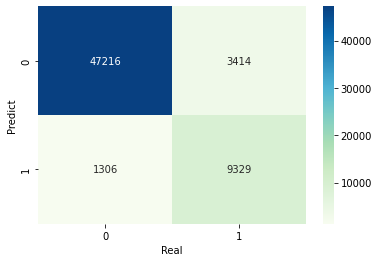

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
#构建混淆矩阵
cm = pd.crosstab(gnb_pred,y_test)
#绘制混淆矩阵图
sns.heatmap(cm,annot=True,cmap='GnBu',fmt = 'd')
#设置x轴和y轴标签
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

In [24]:
print('模型的准确率为:',metrics.accuracy_score(y_test,gnb_pred))
print('模型的评估报告为:\n',metrics.classification_report(y_test,gnb_pred))

模型的准确率为: 0.9229576430261976
模型的评估报告为:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     48522
           1       0.88      0.73      0.80     12743

    accuracy                           0.92     61265
   macro avg       0.90      0.85      0.88     61265
weighted avg       0.92      0.92      0.92     61265



In [25]:
#计算正例的预测概率用于生成ROC曲线的数据
y_score = gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)

In [27]:
#计算AUC
roc_auc = metrics.auc(fpr,tpr)

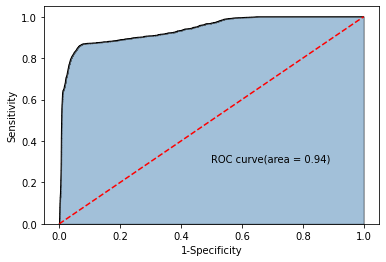

In [28]:
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor = 'black')
#添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
#添加对角线
plt.plot([0,1],[0,1],color = 'red',linestyle='--')
#添加文本信息
plt.text(0.5,0.3,'ROC curve(area = %0.2f)'%roc_auc)
#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()